Mahan Madani - 99222092

Assignment 1 - Real State Dataset

## Table of Contents:

- [Load Dataset and Import Libraries](##Load-Dataset-and-Import-Libraries)
- [Basic Data Analysis](##Basic-Data-Analysis)
- [Data Preprocessing](##Data-Preprocessing)
- [Feature Engineering](##Feature-Engineering)
- [Visualization](##Visualization)
- [Hypothesis Testing](##Hypothesis-Testing)
    - [Test 1 (t-test)](###Test-1:-Two-sample-t-test)
    - [Test 2 (ANOVA)](###Test-2:-One-Way-ANOVA)
    - [Test 3 (Chi-2)](###Test-3:-Chi-2)
- [Model](##Train-Model)



## Load Dataset and Import Libraries

In [1]:
import os, zipfile
import re

import pandas as pd
import numpy as np
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# !pip install kaggle

# kaggle token
os.environ['KAGGLE_CONFIG_DIR'] = "./.kaggle"

!kaggle datasets download -p ./dataset quantbruce/real-estate-price-prediction

real-estate-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile('./dataset/real-estate-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset')

In [4]:
df = pd.read_csv("dataset/Real estate.csv")
print(df.columns)
print(df.shape)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
(414, 8)


## Basic Data Analysis

In [7]:
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [8]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Data Preprocessing

<h4>Check for Duplicate Values</h4>

In [11]:
columns_to_check_duplicates = list(df.columns)
columns_to_check_duplicates.remove('No')
print(columns_to_check_duplicates)\

duplicated = df.duplicated(subset=columns_to_check_duplicates, keep=False)
duplicate_rows = df[duplicated]

if not duplicate_rows.empty:
    print("Duplicate records found:")
    print(duplicated.sum())
else:
    print("No duplicate records found.")

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']
No duplicate records found.


In [14]:
df_no_duplicates = df.drop_duplicates(subset=columns_to_check_duplicates, keep='first')
df = df_no_duplicates.reset_index(drop=True)
print("Dataframe with no duplicate values:")
print(df.shape)

Dataframe with no duplicate values:
(414, 8)


<h4>Handle Null Values</h4>

In [15]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


<h4>Detect Outlier Values

In [16]:
z_scores = pd.DataFrame(zscore(df['Y house price of unit area']))

threshold = 3
outliers = df[(z_scores.abs() > threshold).any(axis=1)]

print("Outlier records:")
print(outliers.shape)

Outlier records:
(1, 8)


In [17]:
# df = df.drop(outliers.index).shape

## Feature Engineering

Extract a categorical feature to be used later for hypothesis testing.

In [18]:
df['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

In [19]:
# Categorize the X2 house age column
bin_labels = ['very new', 'new', 'old', 'very old']
df['Age'] = pd.qcut(df['X2 house age'], q=4, labels=bin_labels)

df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Age
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,very old
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,old
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,new


## Visualization

In [20]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'Age'],
      dtype='object')

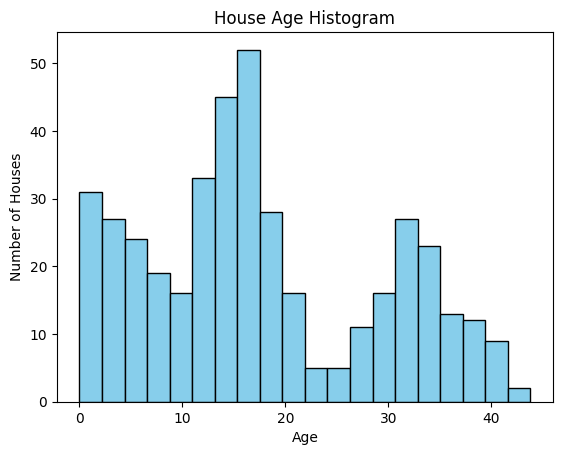

In [21]:
df['X2 house age'].plot(kind='hist', color='skyblue', edgecolor='black', bins=20)

plt.title('House Age Histogram')
plt.ylabel('Number of Houses')
plt.xlabel('Age')
# plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

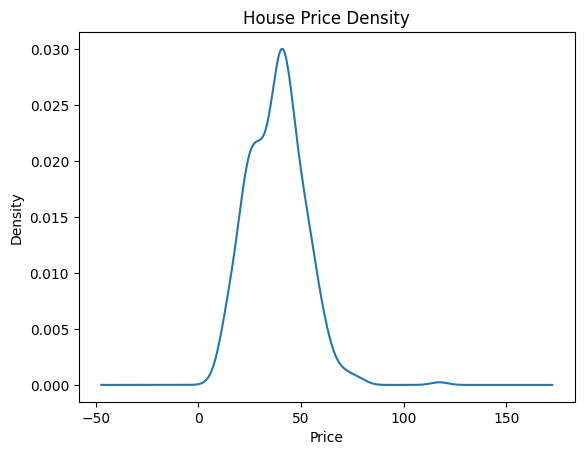

In [22]:
df['Y house price of unit area'].plot(kind='density')

plt.title('House Price Density')
plt.ylabel('Density')
plt.xlabel('Price')
plt.show()

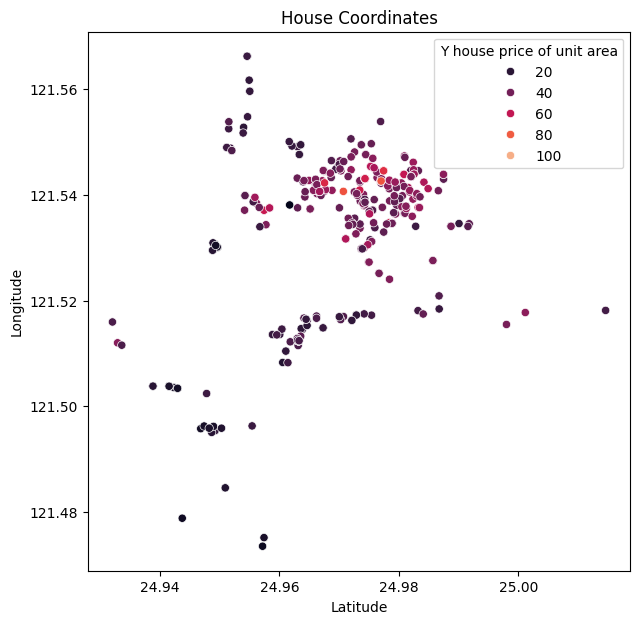

In [23]:
plt.figure(figsize=[7,7])
sns.scatterplot(y='X6 longitude',
                x='X5 latitude',
                hue='Y house price of unit area',
                data=df,
                palette='rocket')

plt.title('House Coordinates')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

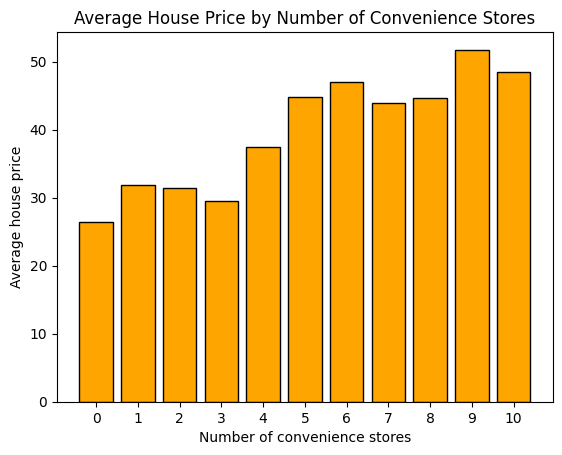

In [24]:
average_price = df.groupby('X4 number of convenience stores')['Y house price of unit area'].mean().reset_index()
plt.bar(average_price['X4 number of convenience stores'],
        average_price['Y house price of unit area'],
        color='orange', edgecolor='black')

plt.xticks(average_price['X4 number of convenience stores'])

plt.xlabel('Number of convenience stores')
plt.ylabel('Average house price')
plt.title('Average House Price by Number of Convenience Stores')
plt.show()

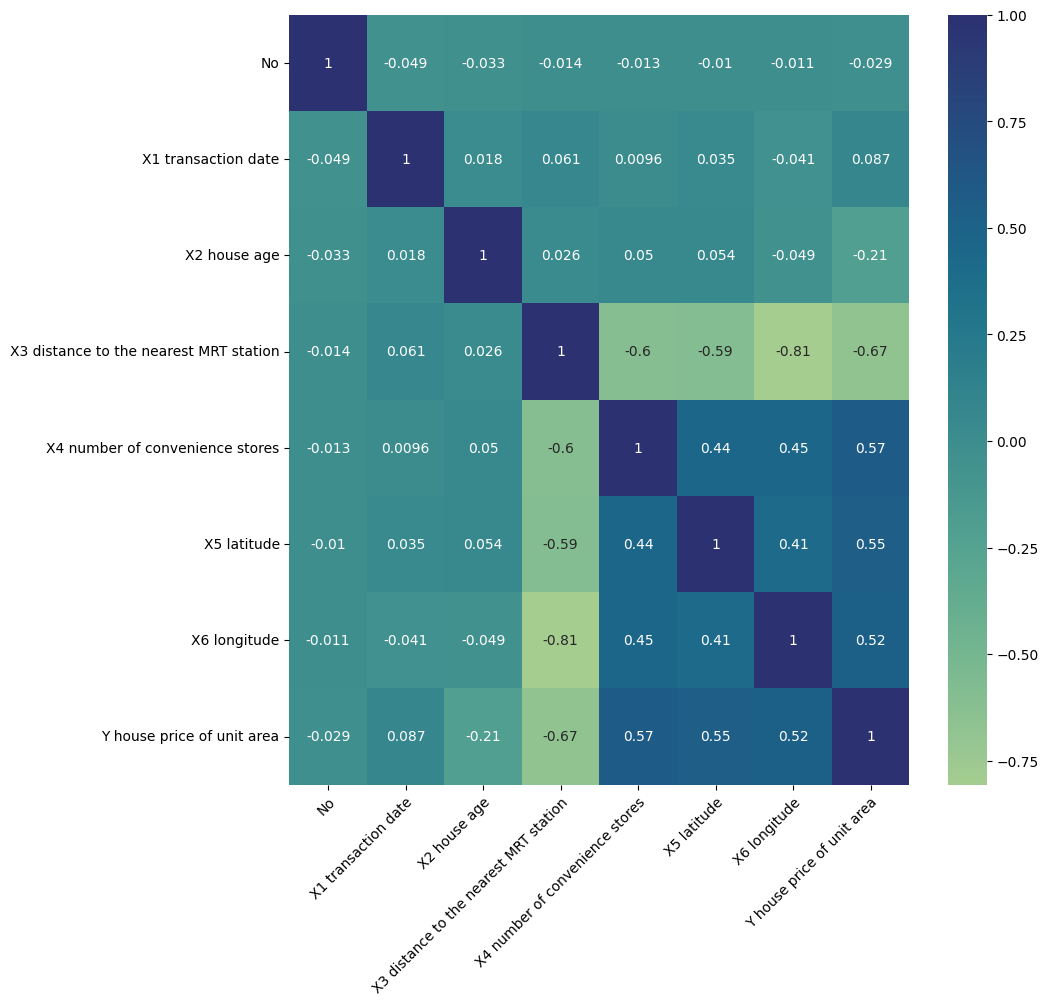

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

## Hypothesis Testing

### Test 1: Two-sample t-test
Null hypothesis: There is no significant difference between the average price per unit area of houses above the median age and those below the median age.

In [26]:
sample_size = 200
sample = df.sample(n=sample_size, random_state=3)

median_age = df['X2 house age'].median()

group1 = df[df['X2 house age'] > median_age]['Y house price of unit area']
group2 = df[df['X2 house age'] <= median_age]['Y house price of unit area']

In [27]:
from scipy.stats import ttest_ind

# two-sample t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-Statistic: -4.983248787230827
P-Value: 9.222058819283308e-07
Reject the null hypothesis.


### Test 2: One Way ANOVA
Null Hypothesis: There is no significant difference between the average price per unit area and the number of convenience stores.

In [28]:
df['X4 number of convenience stores'].value_counts().sort_index()

X4 number of convenience stores
0     67
1     46
2     24
3     46
4     31
5     67
6     37
7     31
8     30
9     25
10    10
Name: count, dtype: int64

The data must be grouped by the categorical feature (which is the number of convenience stores). The values of 'Y house price of unit area' are then compared between these different groups.

In [29]:
from scipy.stats import f_oneway

# ANOVA test
grouped_data = [group['Y house price of unit area'] for name, group in df.groupby('X4 number of convenience stores')]
anova_result = f_oneway(*grouped_data)

statistic = anova_result.statistic
p_value = anova_result.pvalue

print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Statistic: 24.920758967875983
P-Value: 1.1781067247237561e-36
Reject the null hypothesis.


### Test 3: Chi-2
Null hypothesis: There is no significant association between the two categories.

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['X4 number of convenience stores'], df['Age'])

# Chi-2 test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-Square Statistic: 135.1721201188804
P-value: 2.655361017983455e-15
Reject the null hypothesis.


## Train Model

In [32]:
numerical_columns = ['X1 transaction date',
        'X2 house age',
        'X3 distance to the nearest MRT station',
        'X4 number of convenience stores',
        'X5 latitude',
        'X6 longitude']
X = df[numerical_columns]

y = df['Y house price of unit area']

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, columns=numerical_columns)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [41]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 53.30472716577535


In [43]:
model.coef_

array([ 1.66025733, -2.97930324, -5.87069008,  3.59385229,  2.70177658,
       -0.44803345])

In [44]:
feature_names = X.columns
weights = model.coef_

weights_df = pd.DataFrame({'Feature name': feature_names, 'Weight': weights})
print(weights_df)


                             Feature name    Weight
0                     X1 transaction date  1.660257
1                            X2 house age -2.979303
2  X3 distance to the nearest MRT station -5.870690
3         X4 number of convenience stores  3.593852
4                             X5 latitude  2.701777
5                            X6 longitude -0.448033
